# Dossier de modélisation statitique 

Quentin GENSE - Gwénaël PETIT - Anita RIVOT - Louis SOYEZ

## Description du sujet et de la base de données 

Sujet : 
Données et variables : 
Source : 

In [5]:
#Bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#Importation des données
data = pd.read_csv("train.csv")
data

X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

## Statistiques univariées

### Préparation des données

In [9]:
#Liste des variables
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
#Selection des variables
df1 = data[['SalePrice', 'OverallQual','GrLivArea','GarageCars','GarageArea', 'TotalBsmtSF' ,'1stFlrSF', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd',
         'Fireplaces', 'FireplaceQu', 'FullBath', 'HalfBath', 'KitchenQual', 'BsmtHalfBath','BsmtFullBath','BsmtQual', 'BsmtFinSF1', 
            'Neighborhood', 'LotArea', 'ExterQual','HouseStyle' , 'GarageYrBlt', 'YrSold', 'OpenPorchSF','EnclosedPorch','ScreenPorch','3SsnPorch', 
            'MSZoning']]
df1

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,YearBuilt,YearRemodAdd,...,LotArea,ExterQual,HouseStyle,GarageYrBlt,YrSold,OpenPorchSF,EnclosedPorch,ScreenPorch,3SsnPorch,MSZoning
0,208500,7,1710,2,548,856,856,854,2003,2003,...,8450,Gd,2Story,2003.0,2008,61,0,0,0,RL
1,181500,6,1262,2,460,1262,1262,0,1976,1976,...,9600,TA,1Story,1976.0,2007,0,0,0,0,RL
2,223500,7,1786,2,608,920,920,866,2001,2002,...,11250,Gd,2Story,2001.0,2008,42,0,0,0,RL
3,140000,7,1717,3,642,756,961,756,1915,1970,...,9550,TA,2Story,1998.0,2006,35,272,0,0,RL
4,250000,8,2198,3,836,1145,1145,1053,2000,2000,...,14260,Gd,2Story,2000.0,2008,84,0,0,0,RL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,694,1999,2000,...,7917,TA,2Story,1999.0,2007,40,0,0,0,RL
1456,210000,6,2073,2,500,1542,2073,0,1978,1988,...,13175,TA,1Story,1978.0,2010,0,0,0,0,RL
1457,266500,7,2340,1,252,1152,1188,1152,1941,2006,...,9042,Ex,2Story,1941.0,2010,60,0,0,0,RL
1458,142125,5,1078,1,240,1078,1078,0,1950,1996,...,9717,TA,1Story,1950.0,2010,0,112,0,0,RL


In [11]:
#Création de la variable NbFloors
df1['2ndFlrSF'].value_counts()
df1.loc[:, 'NbFloors'] = np.where(data['2ndFlrSF'] > 0, 1, 0)

C:\Users\quent\AppData\Local\Temp\ipykernel_11392\4131601470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'NbFloors'] = np.where(data['2ndFlrSF'] > 0, 1, 0)


In [12]:
df1

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,YearBuilt,YearRemodAdd,...,ExterQual,HouseStyle,GarageYrBlt,YrSold,OpenPorchSF,EnclosedPorch,ScreenPorch,3SsnPorch,MSZoning,NbFloors
0,208500,7,1710,2,548,856,856,854,2003,2003,...,Gd,2Story,2003.0,2008,61,0,0,0,RL,1
1,181500,6,1262,2,460,1262,1262,0,1976,1976,...,TA,1Story,1976.0,2007,0,0,0,0,RL,0
2,223500,7,1786,2,608,920,920,866,2001,2002,...,Gd,2Story,2001.0,2008,42,0,0,0,RL,1
3,140000,7,1717,3,642,756,961,756,1915,1970,...,TA,2Story,1998.0,2006,35,272,0,0,RL,1
4,250000,8,2198,3,836,1145,1145,1053,2000,2000,...,Gd,2Story,2000.0,2008,84,0,0,0,RL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,694,1999,2000,...,TA,2Story,1999.0,2007,40,0,0,0,RL,1
1456,210000,6,2073,2,500,1542,2073,0,1978,1988,...,TA,1Story,1978.0,2010,0,0,0,0,RL,0
1457,266500,7,2340,1,252,1152,1188,1152,1941,2006,...,Ex,2Story,1941.0,2010,60,0,0,0,RL,1
1458,142125,5,1078,1,240,1078,1078,0,1950,1996,...,TA,1Story,1950.0,2010,0,112,0,0,RL,0


In [13]:
#Création de la variable TotalSF
df1['TotalSF'] = df1['1stFlrSF'] + df1['2ndFlrSF']

C:\Users\quent\AppData\Local\Temp\ipykernel_11392\364744390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalSF'] = df1['1stFlrSF'] + df1['2ndFlrSF']


In [14]:
df1

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,YearBuilt,YearRemodAdd,...,HouseStyle,GarageYrBlt,YrSold,OpenPorchSF,EnclosedPorch,ScreenPorch,3SsnPorch,MSZoning,NbFloors,TotalSF
0,208500,7,1710,2,548,856,856,854,2003,2003,...,2Story,2003.0,2008,61,0,0,0,RL,1,1710
1,181500,6,1262,2,460,1262,1262,0,1976,1976,...,1Story,1976.0,2007,0,0,0,0,RL,0,1262
2,223500,7,1786,2,608,920,920,866,2001,2002,...,2Story,2001.0,2008,42,0,0,0,RL,1,1786
3,140000,7,1717,3,642,756,961,756,1915,1970,...,2Story,1998.0,2006,35,272,0,0,RL,1,1717
4,250000,8,2198,3,836,1145,1145,1053,2000,2000,...,2Story,2000.0,2008,84,0,0,0,RL,1,2198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,694,1999,2000,...,2Story,1999.0,2007,40,0,0,0,RL,1,1647
1456,210000,6,2073,2,500,1542,2073,0,1978,1988,...,1Story,1978.0,2010,0,0,0,0,RL,0,2073
1457,266500,7,2340,1,252,1152,1188,1152,1941,2006,...,2Story,1941.0,2010,60,0,0,0,RL,1,2340
1458,142125,5,1078,1,240,1078,1078,0,1950,1996,...,1Story,1950.0,2010,0,112,0,0,RL,0,1078


In [15]:
#Création d'une variable pour caluculer l'age du bien
df1['Age'] = df1['YrSold'] - df1['YearBuilt']

C:\Users\quent\AppData\Local\Temp\ipykernel_11392\3430854747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = df1['YrSold'] - df1['YearBuilt']


In [16]:
df1

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,YearBuilt,YearRemodAdd,...,GarageYrBlt,YrSold,OpenPorchSF,EnclosedPorch,ScreenPorch,3SsnPorch,MSZoning,NbFloors,TotalSF,Age
0,208500,7,1710,2,548,856,856,854,2003,2003,...,2003.0,2008,61,0,0,0,RL,1,1710,5
1,181500,6,1262,2,460,1262,1262,0,1976,1976,...,1976.0,2007,0,0,0,0,RL,0,1262,31
2,223500,7,1786,2,608,920,920,866,2001,2002,...,2001.0,2008,42,0,0,0,RL,1,1786,7
3,140000,7,1717,3,642,756,961,756,1915,1970,...,1998.0,2006,35,272,0,0,RL,1,1717,91
4,250000,8,2198,3,836,1145,1145,1053,2000,2000,...,2000.0,2008,84,0,0,0,RL,1,2198,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,694,1999,2000,...,1999.0,2007,40,0,0,0,RL,1,1647,8
1456,210000,6,2073,2,500,1542,2073,0,1978,1988,...,1978.0,2010,0,0,0,0,RL,0,2073,32
1457,266500,7,2340,1,252,1152,1188,1152,1941,2006,...,1941.0,2010,60,0,0,0,RL,1,2340,69
1458,142125,5,1078,1,240,1078,1078,0,1950,1996,...,1950.0,2010,0,112,0,0,RL,0,1078,60


In [17]:
#Calcul de la taille totale en salle de bain
df1['TotalBath'] = df1['FullBath'] + 0.5*df1['HalfBath'] + df1['BsmtFullBath'] + 0.5*df1['BsmtHalfBath']

C:\Users\quent\AppData\Local\Temp\ipykernel_11392\907296568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalBath'] = df1['FullBath'] + 0.5*df1['HalfBath'] + df1['BsmtFullBath'] + 0.5*df1['BsmtHalfBath']


In [18]:
df1

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,YearBuilt,YearRemodAdd,...,YrSold,OpenPorchSF,EnclosedPorch,ScreenPorch,3SsnPorch,MSZoning,NbFloors,TotalSF,Age,TotalBath
0,208500,7,1710,2,548,856,856,854,2003,2003,...,2008,61,0,0,0,RL,1,1710,5,3.5
1,181500,6,1262,2,460,1262,1262,0,1976,1976,...,2007,0,0,0,0,RL,0,1262,31,2.5
2,223500,7,1786,2,608,920,920,866,2001,2002,...,2008,42,0,0,0,RL,1,1786,7,3.5
3,140000,7,1717,3,642,756,961,756,1915,1970,...,2006,35,272,0,0,RL,1,1717,91,2.0
4,250000,8,2198,3,836,1145,1145,1053,2000,2000,...,2008,84,0,0,0,RL,1,2198,8,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,694,1999,2000,...,2007,40,0,0,0,RL,1,1647,8,2.5
1456,210000,6,2073,2,500,1542,2073,0,1978,1988,...,2010,0,0,0,0,RL,0,2073,32,3.0
1457,266500,7,2340,1,252,1152,1188,1152,1941,2006,...,2010,60,0,0,0,RL,1,2340,69,2.0
1458,142125,5,1078,1,240,1078,1078,0,1950,1996,...,2010,0,112,0,0,RL,0,1078,60,2.0


In [19]:
df1['TotalPorchSF'] = df1['OpenPorchSF'] + df1['EnclosedPorch'] + df1['ScreenPorch'] + df1['3SsnPorch']
df1

C:\Users\quent\AppData\Local\Temp\ipykernel_11392\2082817693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalPorchSF'] = df1['OpenPorchSF'] + df1['EnclosedPorch'] + df1['ScreenPorch'] + df1['3SsnPorch']


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,YearBuilt,YearRemodAdd,...,OpenPorchSF,EnclosedPorch,ScreenPorch,3SsnPorch,MSZoning,NbFloors,TotalSF,Age,TotalBath,TotalPorchSF
0,208500,7,1710,2,548,856,856,854,2003,2003,...,61,0,0,0,RL,1,1710,5,3.5,61
1,181500,6,1262,2,460,1262,1262,0,1976,1976,...,0,0,0,0,RL,0,1262,31,2.5,0
2,223500,7,1786,2,608,920,920,866,2001,2002,...,42,0,0,0,RL,1,1786,7,3.5,42
3,140000,7,1717,3,642,756,961,756,1915,1970,...,35,272,0,0,RL,1,1717,91,2.0,307
4,250000,8,2198,3,836,1145,1145,1053,2000,2000,...,84,0,0,0,RL,1,2198,8,3.5,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,694,1999,2000,...,40,0,0,0,RL,1,1647,8,2.5,40
1456,210000,6,2073,2,500,1542,2073,0,1978,1988,...,0,0,0,0,RL,0,2073,32,3.0,0
1457,266500,7,2340,1,252,1152,1188,1152,1941,2006,...,60,0,0,0,RL,1,2340,69,2.0,60
1458,142125,5,1078,1,240,1078,1078,0,1950,1996,...,0,112,0,0,RL,0,1078,60,2.0,112


SalePrice          0
OverallQual        0
GrLivArea          0
GarageCars         0
GarageArea         0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
YearBuilt          0
YearRemodAdd       0
Fireplaces         0
FireplaceQu      690
FullBath           0
HalfBath           0
KitchenQual        0
BsmtHalfBath       0
BsmtFullBath       0
BsmtQual          37
BsmtFinSF1         0
Neighborhood       0
LotArea            0
ExterQual          0
HouseStyle         0
GarageYrBlt       81
YrSold             0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
3SsnPorch          0
MSZoning           0
NbFloors           0
TotalSF            0
Age                0
TotalBath          0
TotalPorchSF       0
dtype: int64

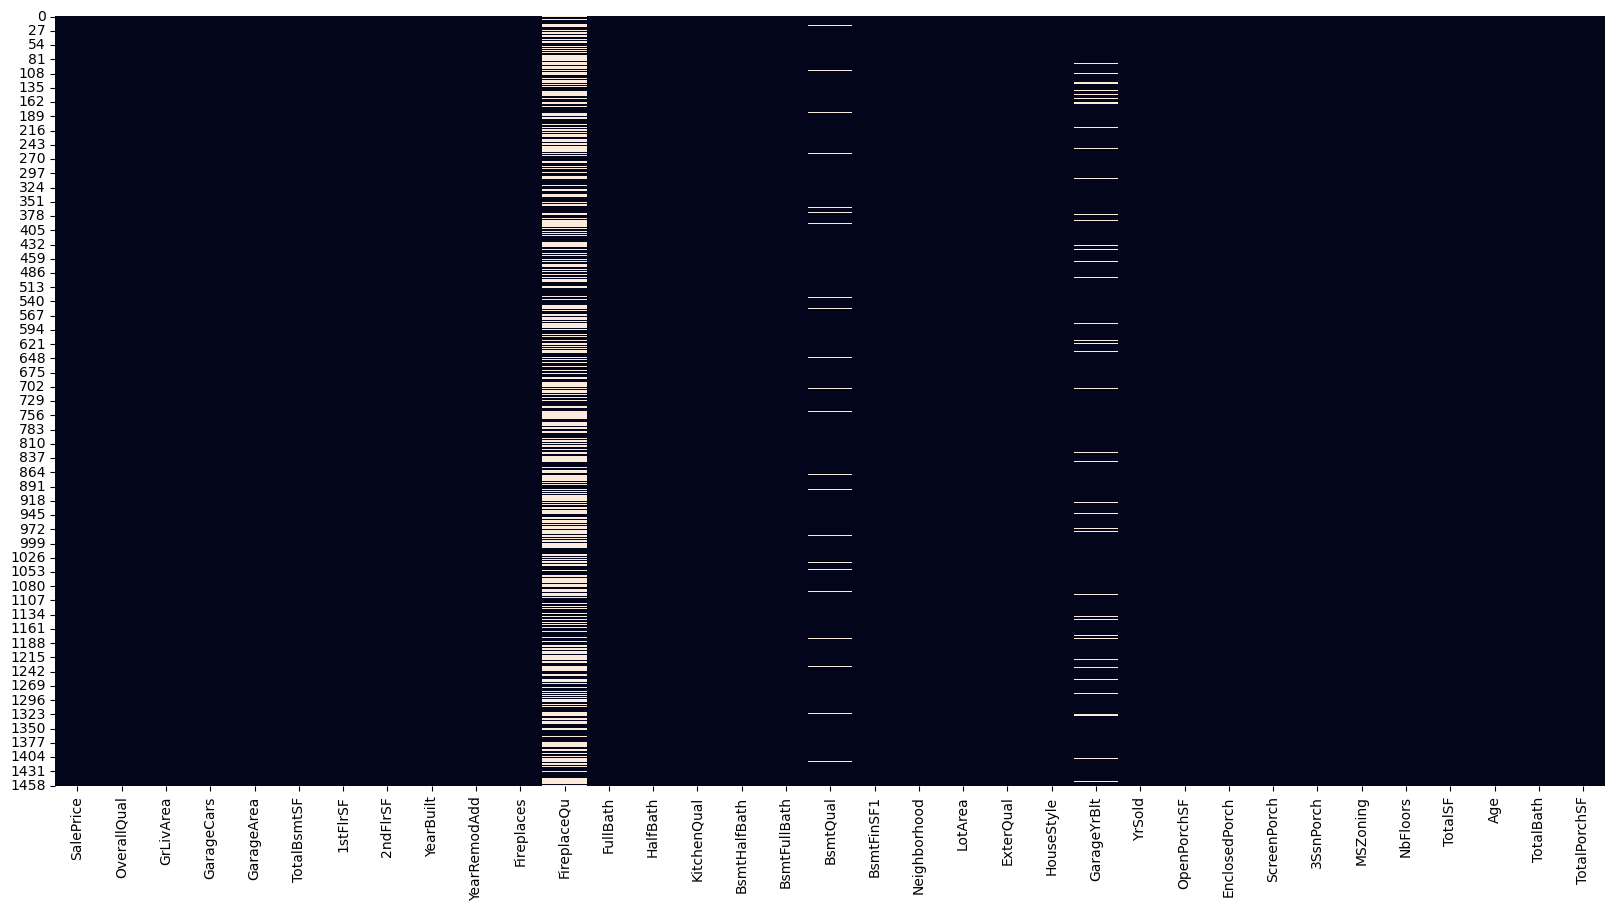

In [20]:
#identification des valeurs manquantes
plt.figure(figsize=(20,10))
sns.heatmap(df1.isna(), cbar=False)
df1.isnull().sum()

In [21]:
#identification des types 
df1.dtypes.value_counts()

int64      25
object      7
float64     2
int32       1
Name: count, dtype: int64

In [22]:
X = df1.drop(columns=['SalePrice'])
y = df1['SalePrice']
variables_quantitatives = X.select_dtypes('int', 'float')
variables_qualitatives = X.select_dtypes('object')

# Variables Quantitatives

A REFAIRE

In [25]:
from scipy.stats import skew

def analyse(X,var,y):
    data = X[var].dropna()

    plt.figure(figsize=(12, 4))

    # Histogramme + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution de {var}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data, color='lightcoral')
    plt.title(f'Boxplot de {var}')

    plt.tight_layout()
    plt.show()

    #Stats
    print("-------------------------------------")
    print("STATISTIQUES DESCRIPTIVES")
    print("-------------------------------------")
    print("Min : ", data.min())
    print("Max : ", data.max())
    print("Moyenne : ", data.mean())
    print("Ecart-type : ", data.std())
    print("Q1 ", data.quantile(0.25))
    print("Q2 : ", data.median())
    print("Q3 ", data.quantile(0.75))
    print("IQR ", data.quantile(0.75) - data.quantile(0.25))

    print("\n-------------------------------------")
    print("QUANTILES EXTREMES")
    print("-------------------------------------")
    print("1% ", data.quantile(0.01))
    print("5% ", data.quantile(0.05))
    print("95% ", data.quantile(0.95))
    print("99% ", data.quantile(0.99))

    # Détection des valeurs aberrantes
    # Skewness
    skewness = skew(data)
    print("\n-------------------------------------")
    print("ASYMETRIE")
    print("-------------------------------------")
    print(f"Skewness de {var} : {skewness:.3f}")

    # Détection des outliers (règle des 1.5*IQR)

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]


    print("\n-------------------------------------")
    print("LIEN AVEC LA VARIABLE CIBLE")
    print("-------------------------------------")
    print("Correlation linéaire avec y: ",np.corrcoef(data,y)[0,1])




In [26]:
variables_quantitatives.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'FullBath', 'HalfBath', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF1',
       'LotArea', 'YrSold', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
       '3SsnPorch', 'NbFloors', 'TotalSF', 'Age', 'TotalPorchSF'],
      dtype='object')

## OverallQual

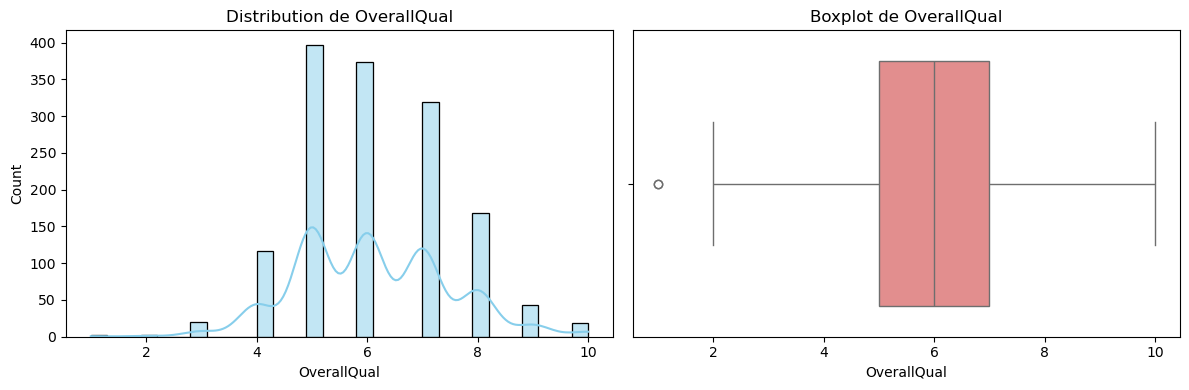

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  1
Max :  10
Moyenne :  6.0993150684931505
Ecart-type :  1.3829965467415923
Q1  5.0
Q2 :  6.0
Q3  7.0
IQR  2.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  3.0
5%  4.0
95%  8.0
99%  10.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de OverallQual : 0.217

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.7909816005838052


In [28]:
analyse(X,'OverallQual',y)

## GrLivArea

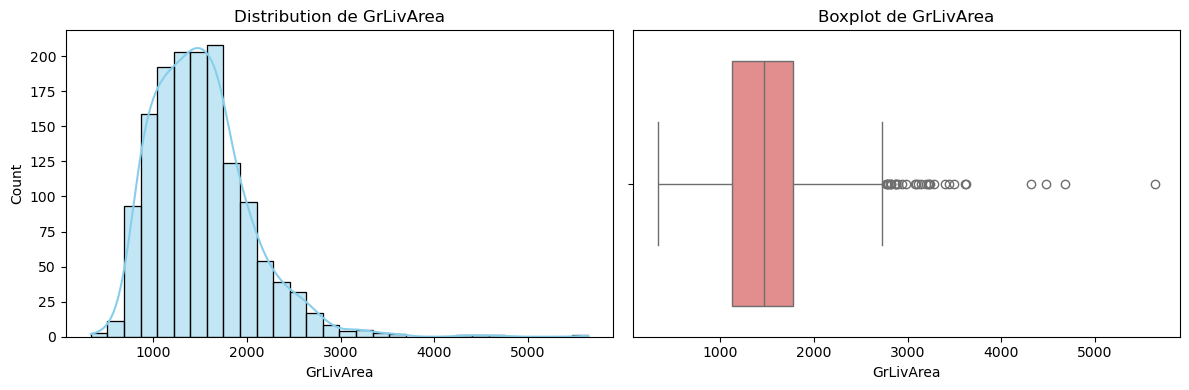

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  334
Max :  5642
Moyenne :  1515.463698630137
Ecart-type :  525.4803834232027
Q1  1129.5
Q2 :  1464.0
Q3  1776.75
IQR  647.25

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  692.18
5%  848.0
95%  2466.1
99%  3123.4800000000023

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de GrLivArea : 1.365

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.7086244776126521


In [30]:
analyse(X,'GrLivArea',y)

In [31]:
import numpy as np
X['GrLivArea_log'] = np.log1p(X['GrLivArea'])

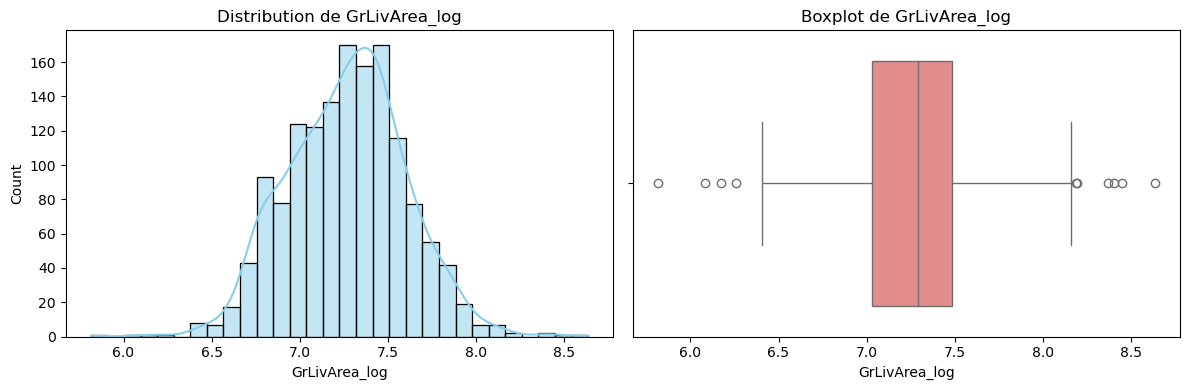

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  5.814130531825066
Max :  8.63817111796914
Moyenne :  7.268511760585581
Ecart-type :  0.33330300926507583
Q1  7.030414998124506
Q2 :  7.289610521451167
Q3  7.483103531937521
IQR  0.4526885338130153

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  6.541288698502259
5%  6.744059186311348
95%  7.810798635170148
99%  8.047013445371395

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de GrLivArea_log : -0.006

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.6951473252879429


In [32]:
analyse(X, 'GrLivArea_log', y)

## GarageCars

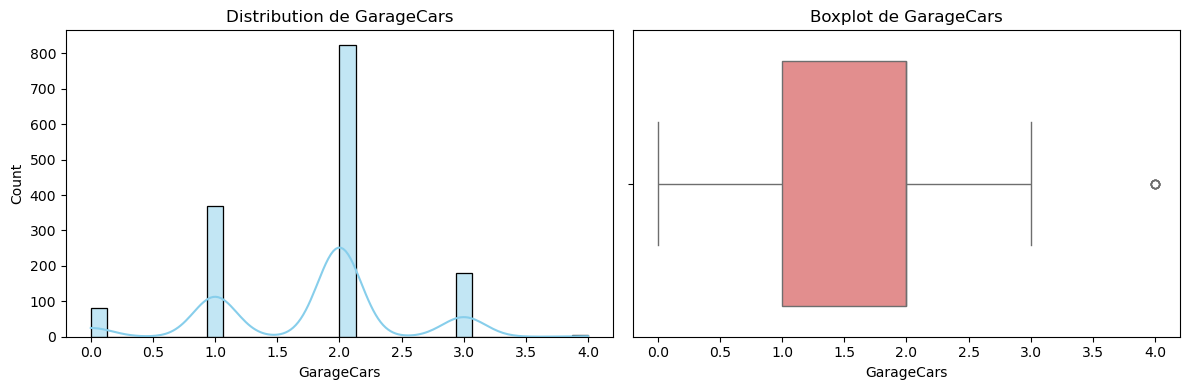

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  4
Moyenne :  1.7671232876712328
Ecart-type :  0.7473150101111116
Q1  1.0
Q2 :  2.0
Q3  2.0
IQR  1.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  3.0
99%  3.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de GarageCars : -0.342

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.6404091972583522


In [34]:
analyse(X, 'GarageCars', y)

## GarageArea

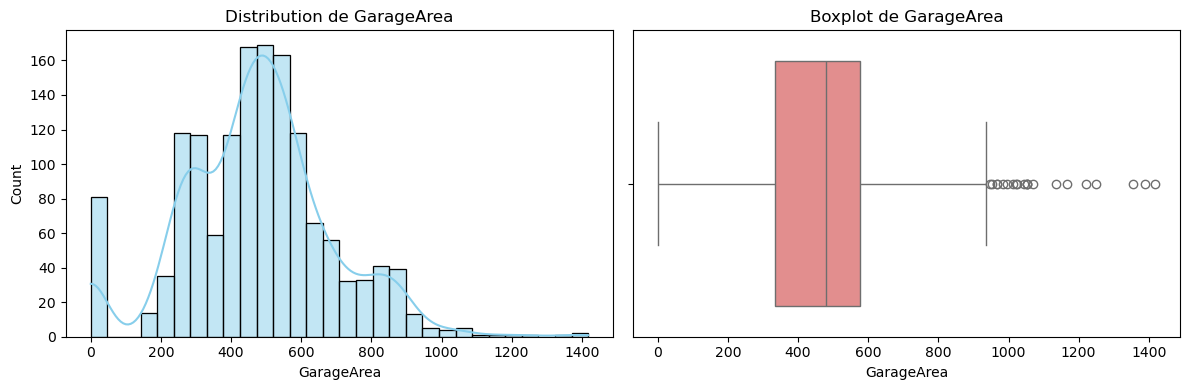

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  1418
Moyenne :  472.9801369863014
Ecart-type :  213.80484145338076
Q1  334.5
Q2 :  480.0
Q3  576.0
IQR  241.5

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  850.0999999999999
99%  1002.7900000000016

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de GarageArea : 0.180

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.6234314389183616


In [36]:
analyse(X, 'GarageArea', y)

In [37]:
X['GarageArea_capped'] = X['GarageArea'].clip(upper=X['GarageArea'].quantile(0.99))

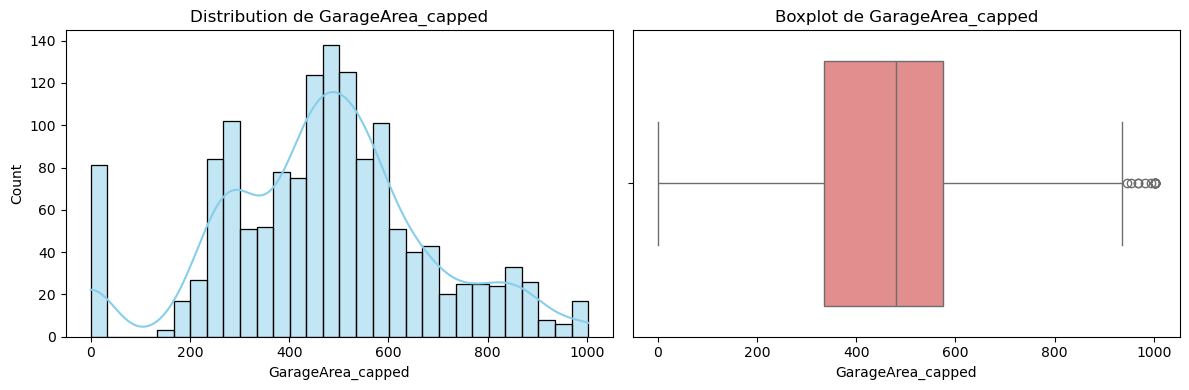

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0.0
Max :  1002.7900000000016
Moyenne :  471.46085616438364
Ecart-type :  208.99619250466318
Q1  334.5
Q2 :  480.0
Q3  576.0
IQR  241.5

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  850.0999999999999
99%  998.1939000000012

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de GarageArea_capped : -0.015

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.6308106768583454


In [38]:
analyse(X, 'GarageArea_capped', y)

## TotalBsmtSF

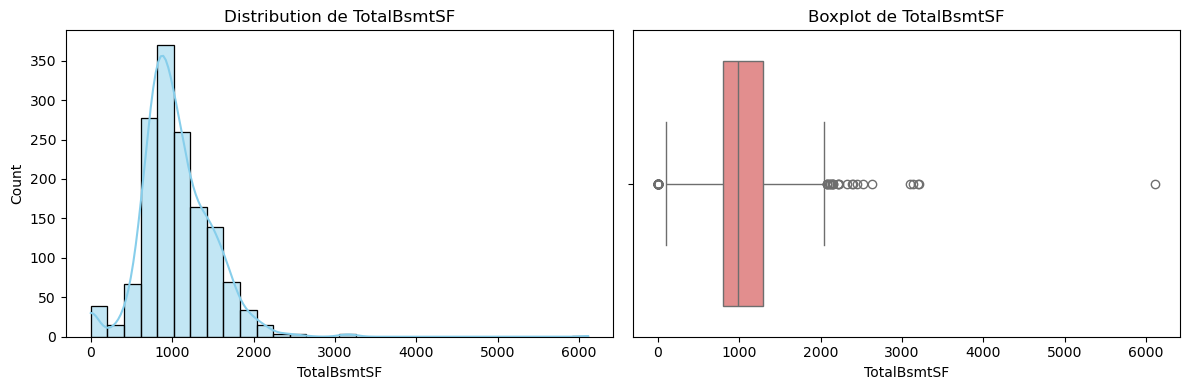

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  6110
Moyenne :  1057.4294520547944
Ecart-type :  438.7053244594705
Q1  795.75
Q2 :  991.5
Q3  1298.25
IQR  502.5

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  519.3000000000001
95%  1753.0
99%  2155.05

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de TotalBsmtSF : 1.523

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.6135805515591954


In [40]:
analyse(X, 'TotalBsmtSF', y)

In [41]:
X['TotalBsmtSF_capped'] = X['TotalBsmtSF'].clip(upper=X['TotalBsmtSF'].quantile(0.99))

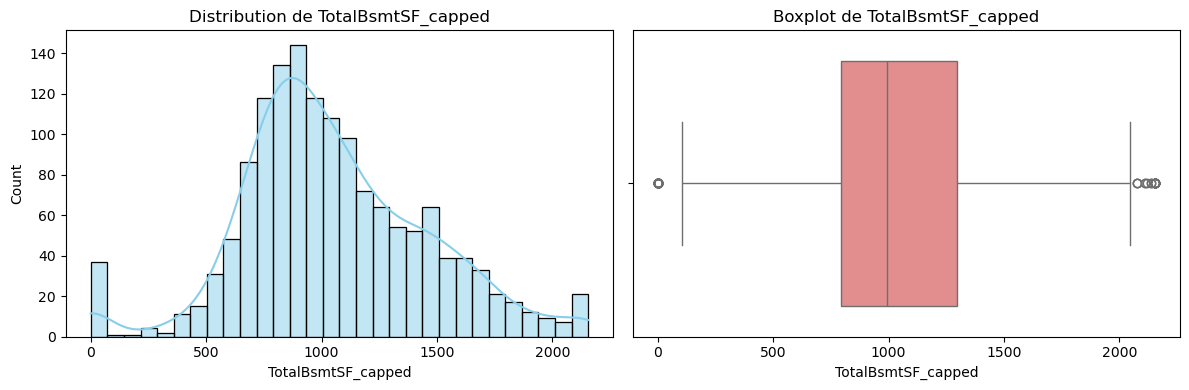

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0.0
Max :  2155.05
Moyenne :  1050.6107876712329
Ecart-type :  404.3878812613343
Q1  795.75
Q2 :  991.5
Q3  1298.25
IQR  502.5

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  519.3000000000001
95%  1753.0
99%  2153.8405000000002

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de TotalBsmtSF_capped : 0.243

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.6385873203571577


In [42]:
analyse(X, 'TotalBsmtSF_capped', y)

## 1stFlrSF

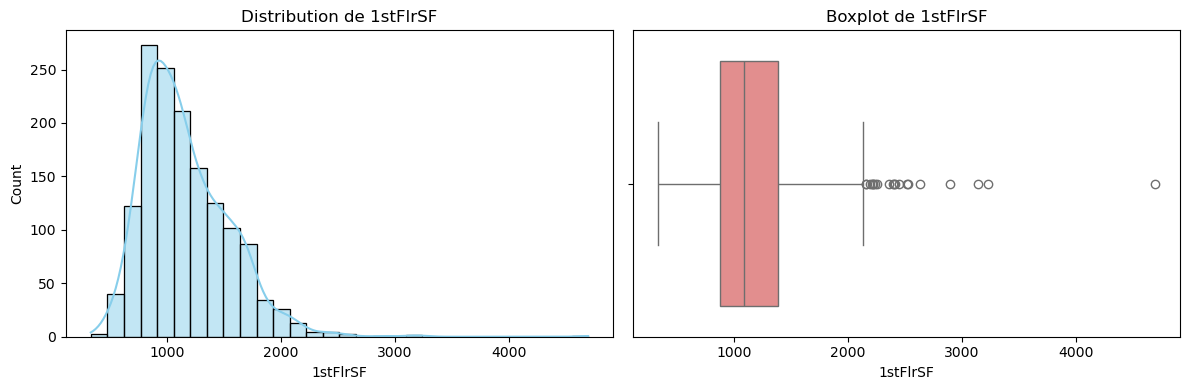

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  334
Max :  4692
Moyenne :  1162.626712328767
Ecart-type :  386.5877380410738
Q1  882.0
Q2 :  1087.0
Q3  1391.25
IQR  509.25

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  520.0
5%  672.95
95%  1831.2499999999998
99%  2219.4600000000005

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de 1stFlrSF : 1.375

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.6058521846919145


In [44]:
analyse(X, '1stFlrSF', y)

L'analyse statistique montre que 1stFlrSF est assimétrique vers la droite (skewness de 1.375), avec une médiane de 1464. L'écart-type est de 386.59 ce qui indique une variabilité notable autour de la moyenne (1162.63). L'écart interquartille compris entre 882 et 1391.25 indique que les valeurs sont essentiellement regroupé autour de cette zone centrale.

Etude des extrêmes : 
- 99% de nos données sont au dessous de 2219.46, ce qui signifie qu'un faible groupe de donnée se trouve dans des valeurs extrêmes. 
- Les valeurs entre 2219.46 et 4692 peuvent être considéré comme très influente sur le modèle

Pour palier à celà, nous allons appliquer une transformation logarithmique afin de limiter l'impact des valeurs extrêmes

In [46]:
X['1stFlrSF_log'] = np.log1p(X['1stFlrSF'])

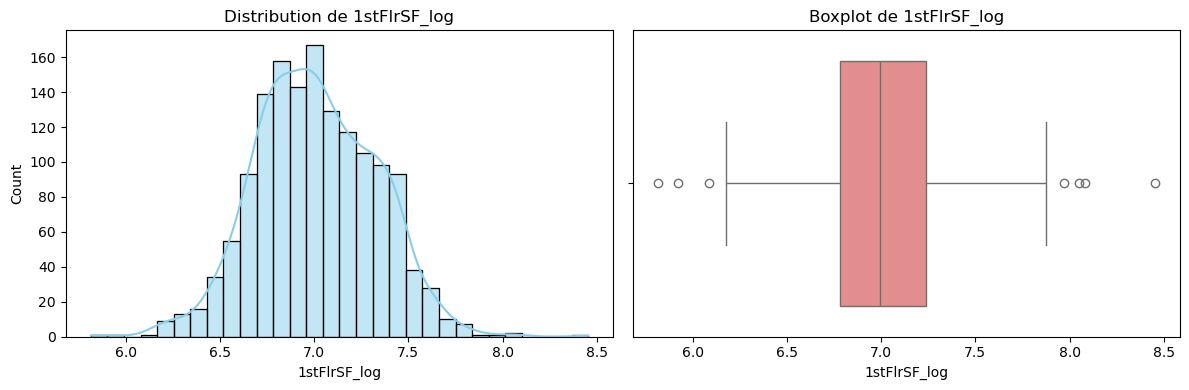

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  5.814130531825066
Max :  8.453827315794417
Moyenne :  7.0084524943231585
Ecart-type :  0.31743113076983664
Q1  6.78332520060396
Q2 :  6.992096005027085
Q3  7.238676374115725
IQR  0.45535117351176524

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  6.255750041753367
5%  6.513155871848928
95%  7.513299822233128
99%  7.705468777768979

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de 1stFlrSF_log : 0.080

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.5912990620354684


In [47]:
analyse(X, '1stFlrSF_log', y)

## 2ndFlrSF

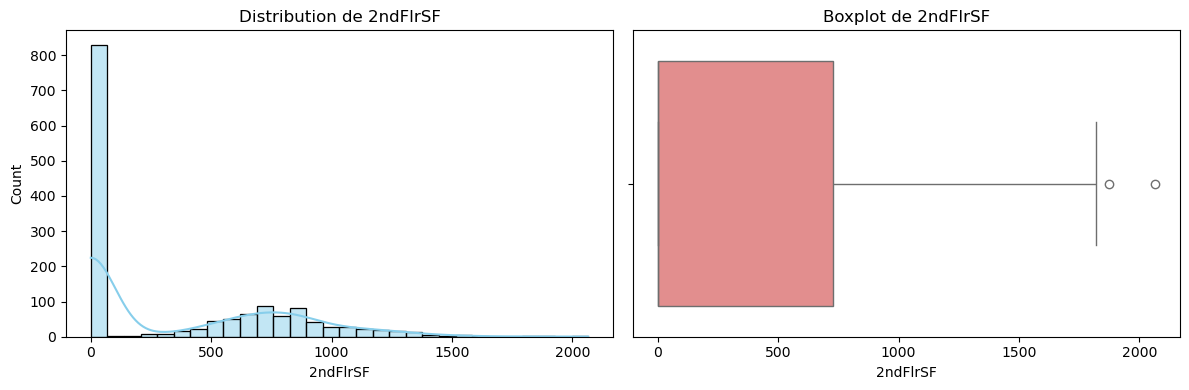

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  2065
Moyenne :  346.99246575342465
Ecart-type :  436.5284358862591
Q1  0.0
Q2 :  0.0
Q3  728.0
IQR  728.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  1141.05
99%  1418.920000000001

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de 2ndFlrSF : 0.812

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.3193338028320677


In [49]:
analyse(X, '2ndFlrSF',y)

In [50]:
X['has_2ndFlr'] = (X['2ndFlrSF'] > 0).astype(int)

## YearBuilt

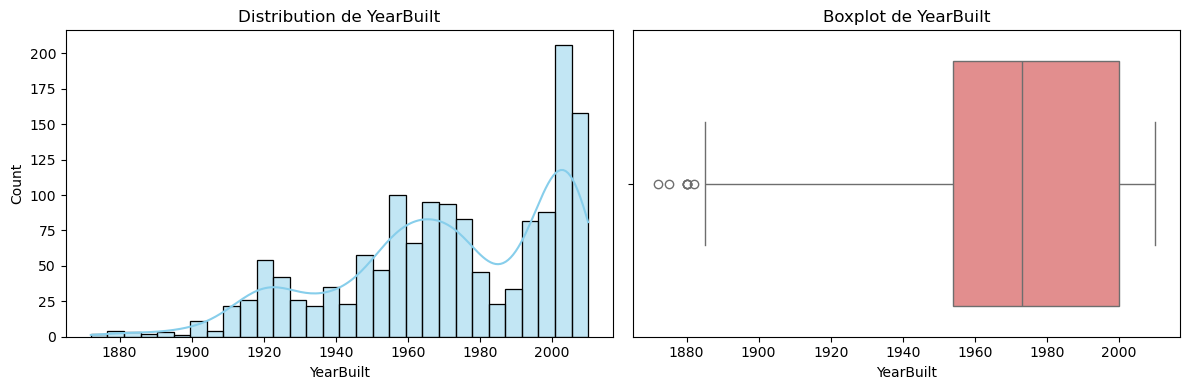

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  1872
Max :  2010
Moyenne :  1971.267808219178
Ecart-type :  30.202904042525265
Q1  1954.0
Q2 :  1973.0
Q3  2000.0
IQR  46.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  1899.18
5%  1916.0
95%  2007.0
99%  2009.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de YearBuilt : -0.613

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.5228973328794968


In [52]:
analyse(X, 'YearBuilt', y)

## YearRemodAdd

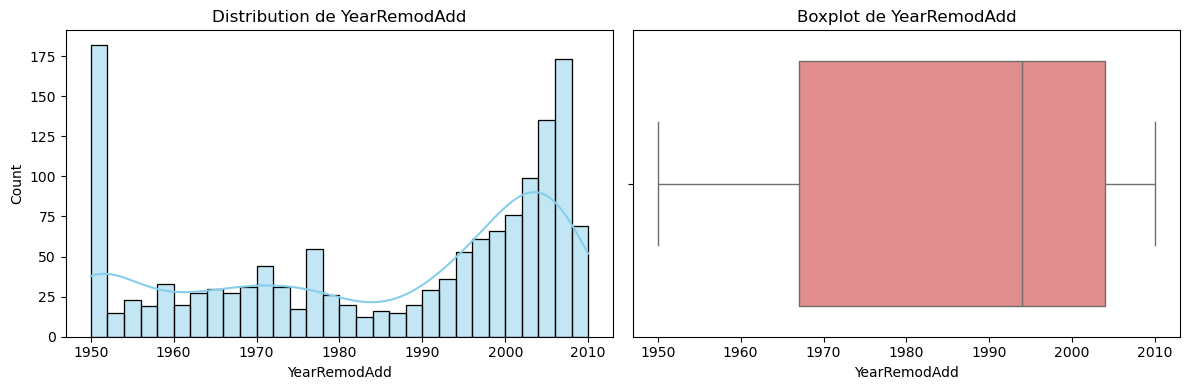

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  1950
Max :  2010
Moyenne :  1984.8657534246574
Ecart-type :  20.645406807709396
Q1  1967.0
Q2 :  1994.0
Q3  2004.0
IQR  37.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  1950.0
5%  1950.0
95%  2007.0
99%  2009.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de YearRemodAdd : -0.503

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.5071009671113862


In [54]:
analyse(X, 'YearRemodAdd', y)

## Fireplaces

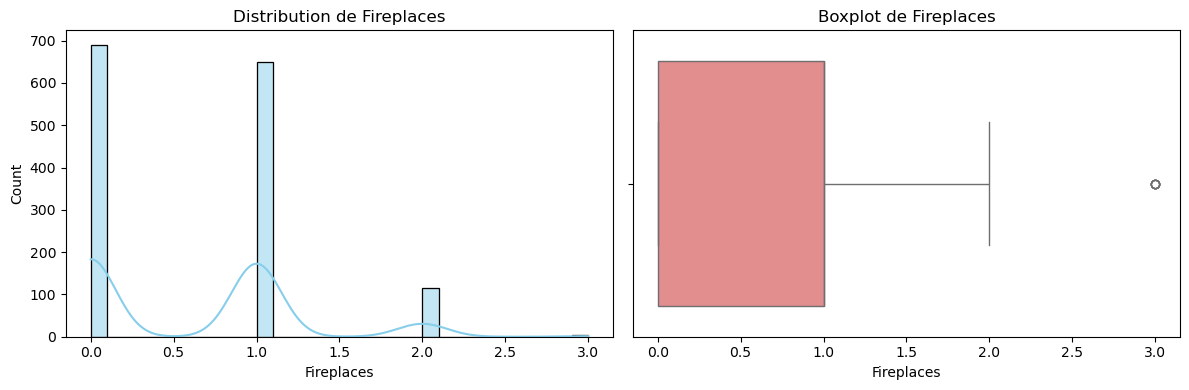

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  3
Moyenne :  0.613013698630137
Ecart-type :  0.6446663863122344
Q1  0.0
Q2 :  1.0
Q3  1.0
IQR  1.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  2.0
99%  2.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de Fireplaces : 0.649

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.46692883675152796


In [56]:
analyse(X, 'Fireplaces', y)

In [57]:
X['Fireplaces_log'] = np.log1p(X['Fireplaces'])

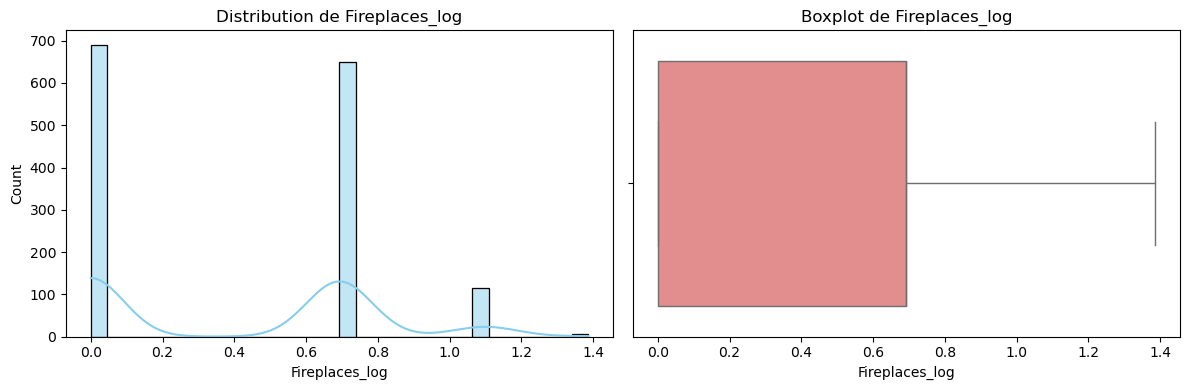

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0.0
Max :  1.3862943611198906
Moyenne :  0.39987503586739487
Ecart-type :  0.3946598513966133
Q1  0.0
Q2 :  0.6931471805599453
Q3  0.6931471805599453
IQR  0.6931471805599453

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  1.0986122886681098
99%  1.0986122886681098

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de Fireplaces_log : 0.182

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.4801355966745232


In [58]:
analyse(X, 'Fireplaces_log', y)

## FullBath

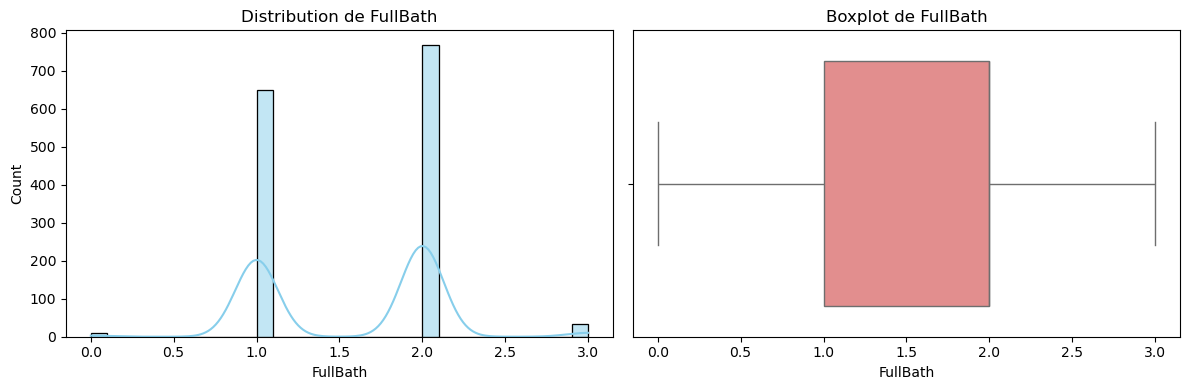

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  3
Moyenne :  1.5650684931506849
Ecart-type :  0.5509158012954318
Q1  1.0
Q2 :  2.0
Q3  2.0
IQR  1.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  1.0
5%  1.0
95%  2.0
99%  3.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de FullBath : 0.037

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.5606637627484456


In [60]:
analyse(X, 'FullBath', y)

## HalfBath

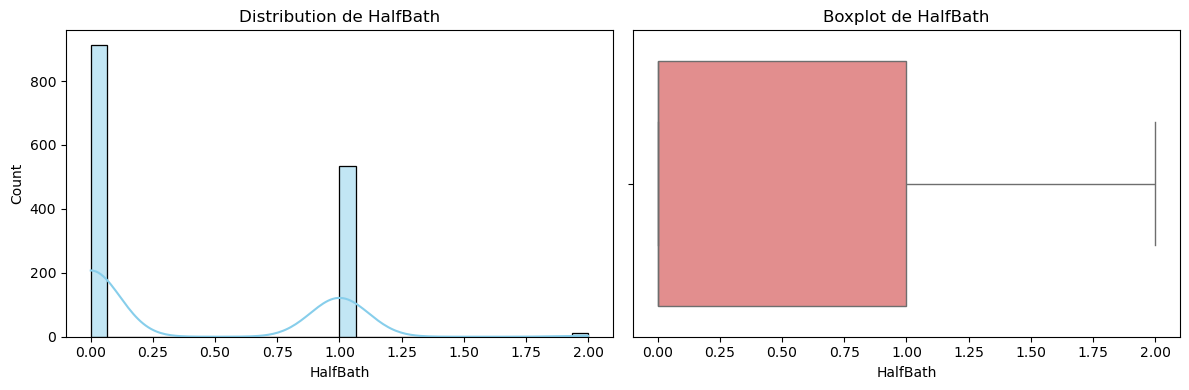

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  2
Moyenne :  0.38287671232876713
Ecart-type :  0.5028853810928973
Q1  0.0
Q2 :  0.0
Q3  1.0
IQR  1.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  1.0
99%  1.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de HalfBath : 0.675

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.2841076755947825


In [62]:
analyse(X, 'HalfBath', y)

## BsmtHalfBath

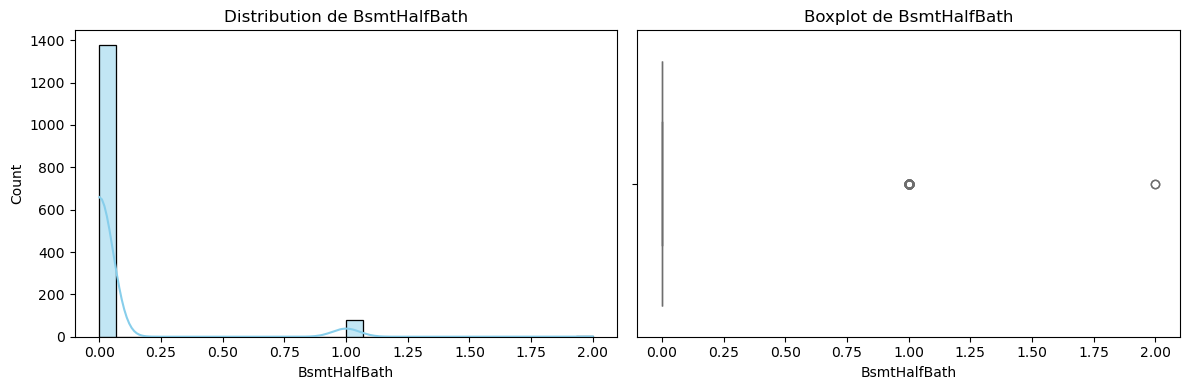

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  2
Moyenne :  0.057534246575342465
Ecart-type :  0.23875264627920764
Q1  0.0
Q2 :  0.0
Q3  0.0
IQR  0.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  1.0
99%  1.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de BsmtHalfBath : 4.099

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  -0.01684415429735901


In [64]:
analyse(X, 'BsmtHalfBath', y)

## BsmtFullBath

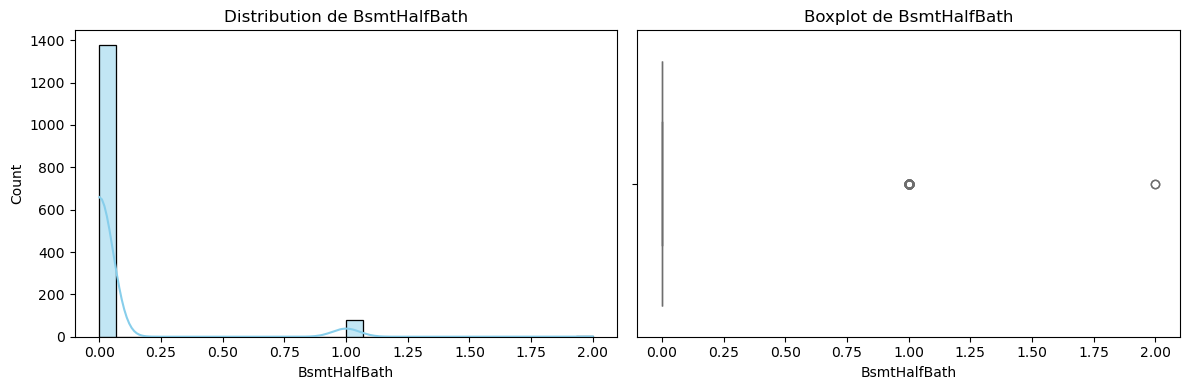

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  2
Moyenne :  0.057534246575342465
Ecart-type :  0.23875264627920764
Q1  0.0
Q2 :  0.0
Q3  0.0
IQR  0.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  1.0
99%  1.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de BsmtHalfBath : 4.099

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  -0.01684415429735901


In [66]:
analyse(X, 'BsmtHalfBath', y)

## BsmtFinSF1

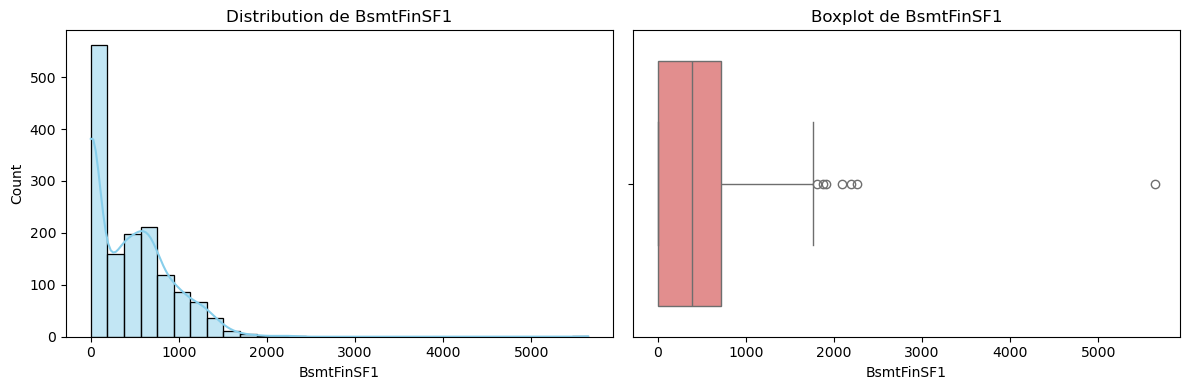

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  5644
Moyenne :  443.6397260273973
Ecart-type :  456.09809084092456
Q1  0.0
Q2 :  383.5
Q3  712.25
IQR  712.25

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  1274.0
99%  1572.41

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de BsmtFinSF1 : 1.684

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.3864198062421531


In [68]:
analyse(X, 'BsmtFinSF1', y)

In [69]:
X['BsmtFinSF1_capped'] = X['BsmtFinSF1'].clip(upper=X['BsmtFinSF1'].quantile(0.99))

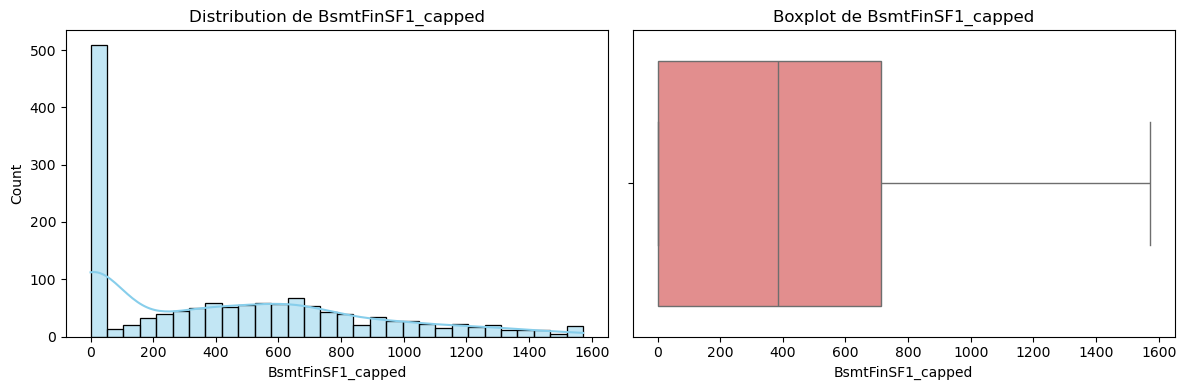

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0.0
Max :  1572.41
Moyenne :  438.5302397260275
Ecart-type :  429.04920324473926
Q1  0.0
Q2 :  383.5
Q3  712.25
IQR  712.25

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  1274.0
99%  1572.1681

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de BsmtFinSF1_capped : 0.687

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.3943403767905648


In [70]:
analyse(X, 'BsmtFinSF1_capped',y)

## LotArea

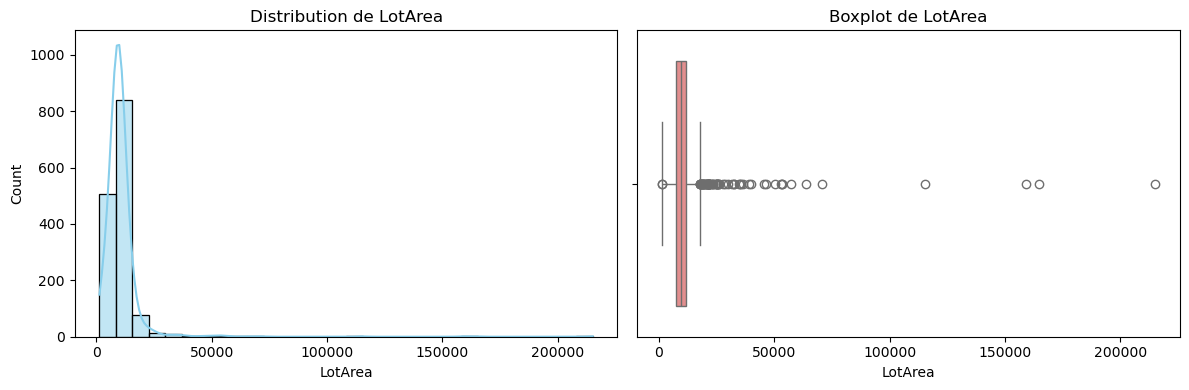

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  1300
Max :  215245
Moyenne :  10516.828082191782
Ecart-type :  9981.264932379147
Q1  7553.5
Q2 :  9478.5
Q3  11601.5
IQR  4048.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  1680.0
5%  3311.7000000000003
95%  17401.149999999998
99%  37567.64000000021

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de LotArea : 12.195

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.2638433538714056


In [72]:
analyse(X, 'LotArea', y)

In [73]:
X['LotArea_capped'] = X['LotArea'].clip(upper=X['LotArea'].quantile(0.95))

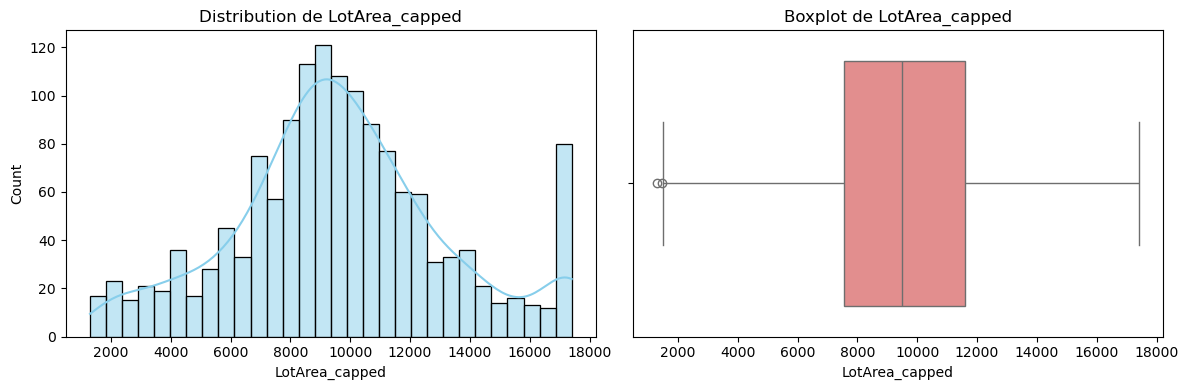

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  1300.0
Max :  17401.149999999998
Moyenne :  9634.192431506848
Ecart-type :  3565.813126747687
Q1  7553.5
Q2 :  9478.5
Q3  11601.5
IQR  4048.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  1680.0
5%  3311.7000000000003
95%  17400.0575
99%  17401.149999999998

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de LotArea_capped : 0.170

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.432993048040872


In [74]:
analyse(X, 'LotArea_capped', y)

## YrSold

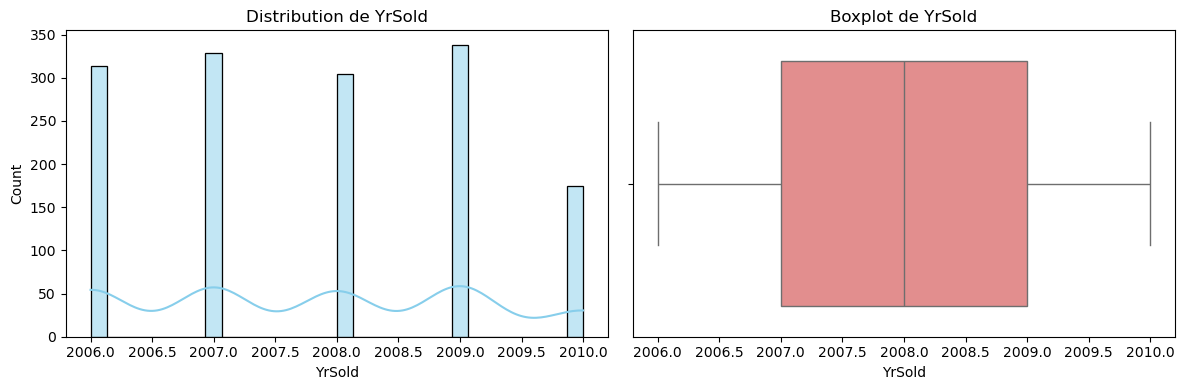

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  2006
Max :  2010
Moyenne :  2007.8157534246575
Ecart-type :  1.328095120552104
Q1  2007.0
Q2 :  2008.0
Q3  2009.0
IQR  2.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  2006.0
5%  2006.0
95%  2010.0
99%  2010.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de YrSold : 0.096

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  -0.028922585168730287


In [76]:
analyse(X, 'YrSold', y)

## OpenPorchSF

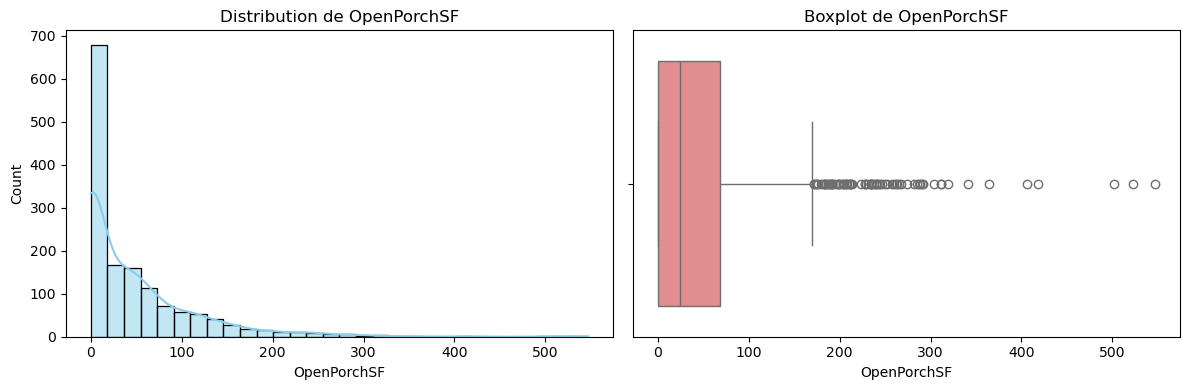

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  547
Moyenne :  46.66027397260274
Ecart-type :  66.25602767664974
Q1  0.0
Q2 :  25.0
Q3  68.0
IQR  68.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  175.04999999999995
99%  285.82000000000016

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de OpenPorchSF : 2.362

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.3158562271160552


In [80]:
analyse(X, 'OpenPorchSF', y)

In [82]:
X['OpenPorchSF_log'] = np.log1p(X['OpenPorchSF'])

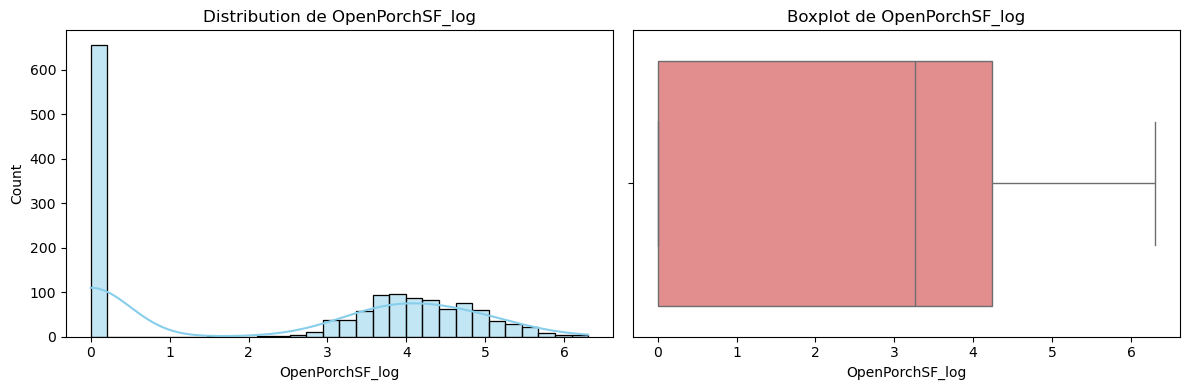

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0.0
Max :  6.306275286948016
Moyenne :  2.3085408330706905
Ecart-type :  2.1523873381540004
Q1  0.0
Q2 :  3.258096538021482
Q3  4.23410650459726
IQR  4.23410650459726

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  5.170767281914935
99%  5.658848965239452

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de OpenPorchSF_log : -0.023

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.4299702130036534


In [84]:
analyse(X, 'OpenPorchSF_log', y)

In [90]:
X['has_OpenPorchSF'] = (X['OpenPorchSF_log'] > 0).astype(int)

## EnclosedPorch

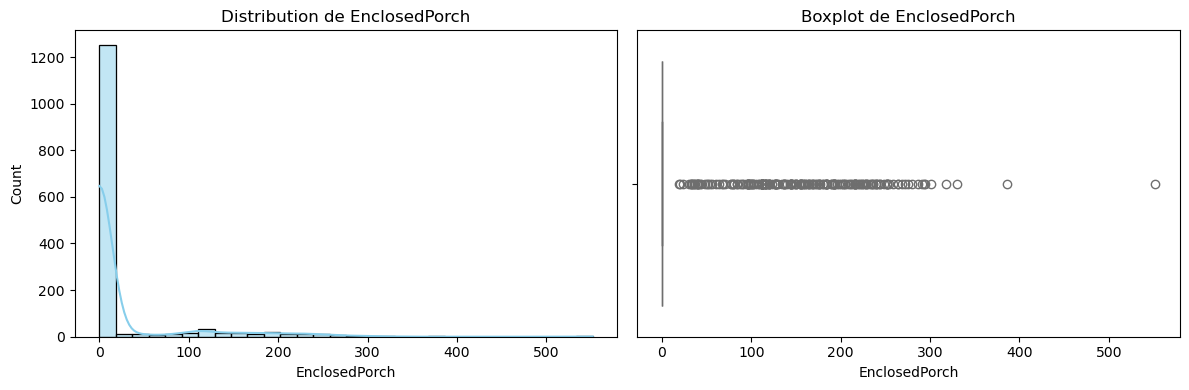

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  552
Moyenne :  21.954109589041096
Ecart-type :  61.11914860172879
Q1  0.0
Q2 :  0.0
Q3  0.0
IQR  0.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  180.14999999999986
99%  261.0500000000004

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de EnclosedPorch : 3.087

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  -0.12857795792595658


In [93]:
analyse(X, 'EnclosedPorch', y)

## ScreenPorch

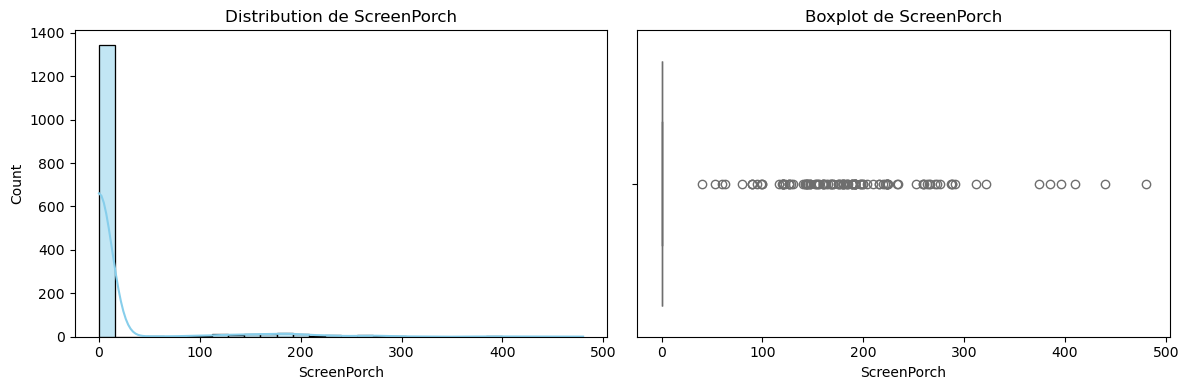

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  480
Moyenne :  15.060958904109588
Ecart-type :  55.757415281874486
Q1  0.0
Q2 :  0.0
Q3  0.0
IQR  0.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  160.0
99%  268.0500000000004

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de ScreenPorch : 4.118

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.11144657114291115


In [100]:
analyse(X, 'ScreenPorch', y)

## 3SsnPorch

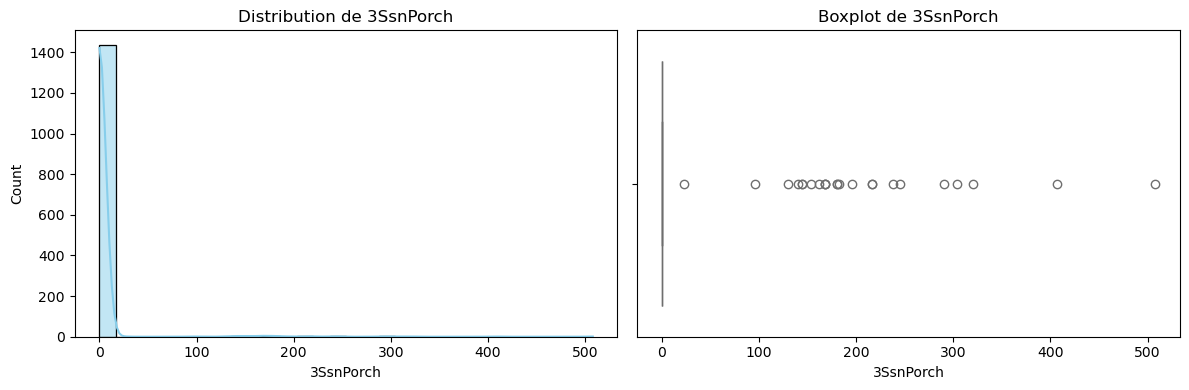

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  508
Moyenne :  3.4095890410958902
Ecart-type :  29.317330556782203
Q1  0.0
Q2 :  0.0
Q3  0.0
IQR  0.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  0.0
99%  168.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de 3SsnPorch : 10.294

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.04458366533574843


In [103]:
analyse(X, '3SsnPorch', y)

In [105]:
X['hasPorch'] = (
    (X['OpenPorchSF'] > 0) |
    (X['EnclosedPorch'] > 0) |
    (X['3SsnPorch'] > 0) |
    (X['ScreenPorch'] > 0)
).astype(int)

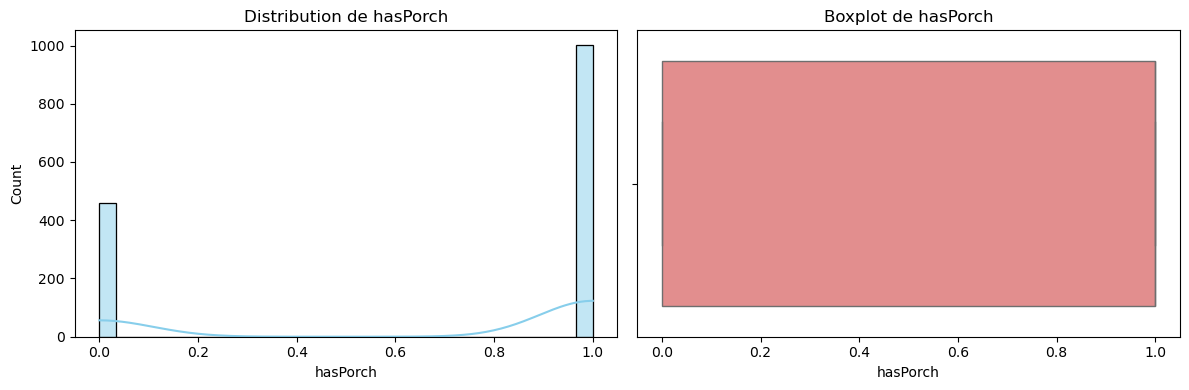

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  1
Moyenne :  0.6863013698630137
Ecart-type :  0.46415445790511406
Q1  0.0
Q2 :  1.0
Q3  1.0
IQR  1.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  1.0
99%  1.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de hasPorch : -0.803

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.29667795189213975


In [107]:
analyse(X, 'hasPorch', y)

## NbFloors

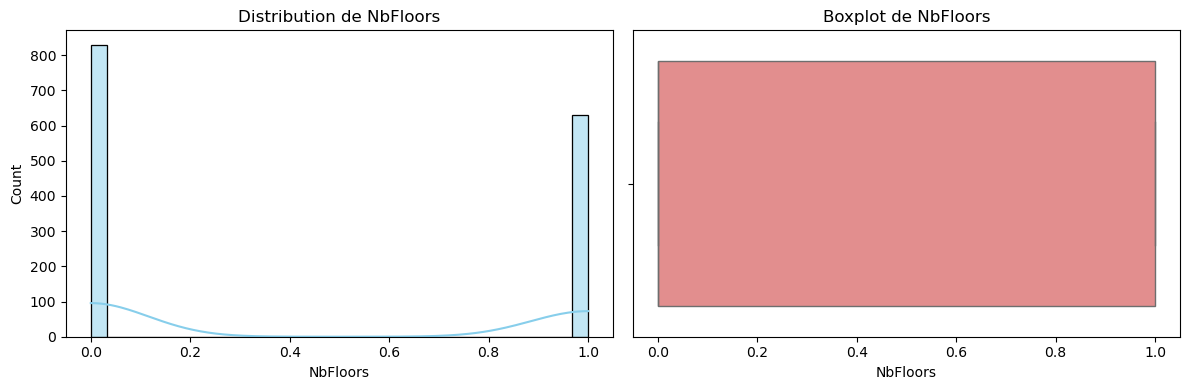

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  1
Moyenne :  0.4321917808219178
Ecart-type :  0.49555044567561324
Q1  0.0
Q2 :  0.0
Q3  1.0
IQR  1.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  1.0
99%  1.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de NbFloors : 0.274

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.13765568369462586


In [114]:
analyse(X, 'NbFloors', y)

## TotalSF

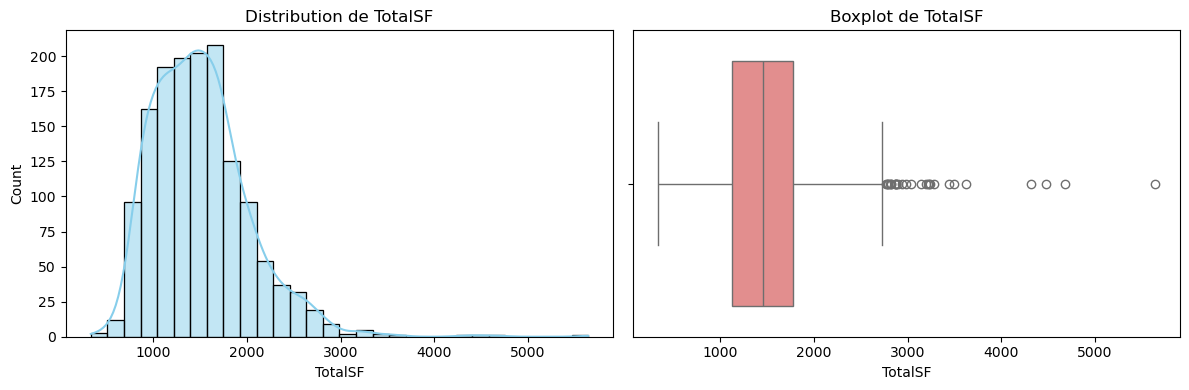

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  334
Max :  5642
Moyenne :  1509.6191780821919
Ecart-type :  521.1635228884062
Q1  1123.75
Q2 :  1458.0
Q3  1775.25
IQR  651.5

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  683.21
5%  848.0
95%  2462.2
99%  2958.5300000000025

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de TotalSF : 1.329

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.716883079369281


In [117]:
analyse(X, 'TotalSF', y)

In [119]:
X['TotalSF_log'] = np.log1p(X['TotalSF'])

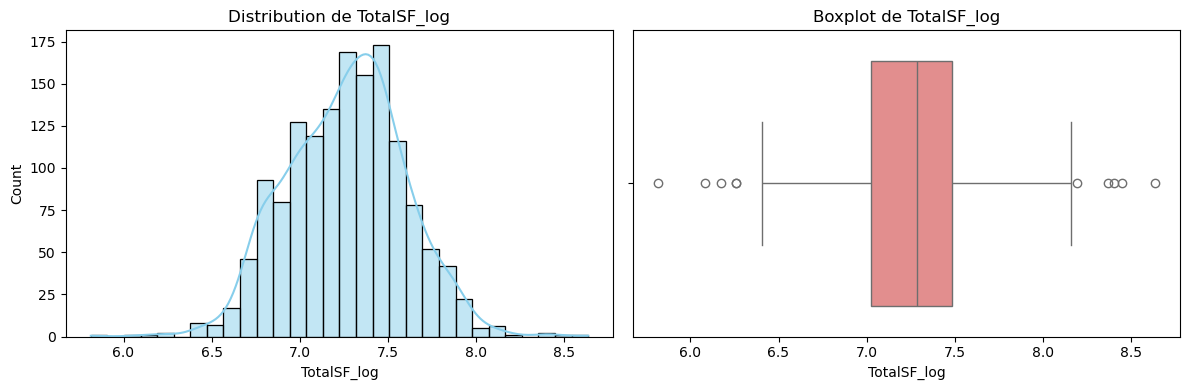

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  5.814130531825066
Max :  8.63817111796914
Moyenne :  7.264729442053215
Ecart-type :  0.3336122107964779
Q1  7.025315993592299
Q2 :  7.285506548522785
Q3  7.482259649702749
IQR  0.4569436561104503

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  6.528171298968763
5%  6.744059186311348
95%  7.809216534040979
99%  7.9927707328557664

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de TotalSF_log : -0.034

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.700568444120487


In [121]:
analyse(X, 'TotalSF_log', y)

In [127]:
X['TotalSF_log_capped'] = X['TotalSF_log'].clip(upper=X['TotalSF_log'].quantile(0.99), lower=X['TotalSF_log'].quantile(0.01))

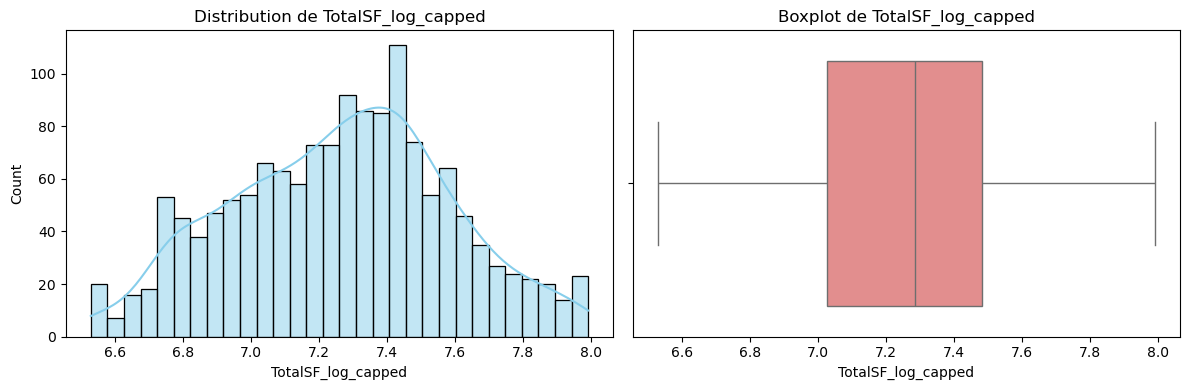

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  6.528171298968763
Max :  7.9927707328557664
Moyenne :  7.264624264049042
Ecart-type :  0.3226051438368335
Q1  7.025315993592299
Q2 :  7.285506548522785
Q3  7.482259649702749
IQR  0.4569436561104503

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  6.534905946391618
5%  6.744059186311348
95%  7.809216534040979
99%  7.990076122714184

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de TotalSF_log_capped : -0.039

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.6965813384159927


In [129]:
analyse(X, 'TotalSF_log_capped', y)

## Age

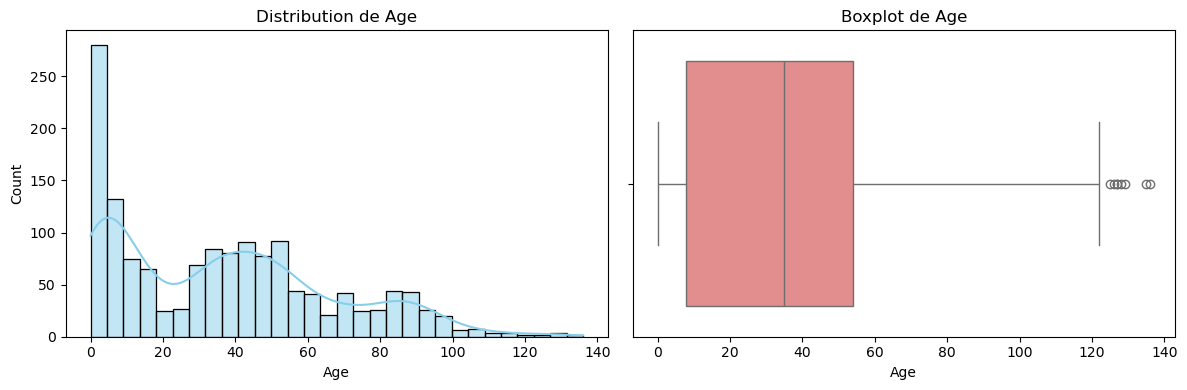

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  136
Moyenne :  36.54794520547945
Ecart-type :  30.250152445654646
Q1  8.0
Q2 :  35.0
Q3  54.0
IQR  46.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  1.0
95%  91.0
99%  110.41000000000008

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de Age : 0.608

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  -0.5233504175468159


In [132]:
analyse(X, 'Age', y)

In [144]:
X['Age_capped'] = X['Age'].clip(upper=X['Age'].quantile(0.95))

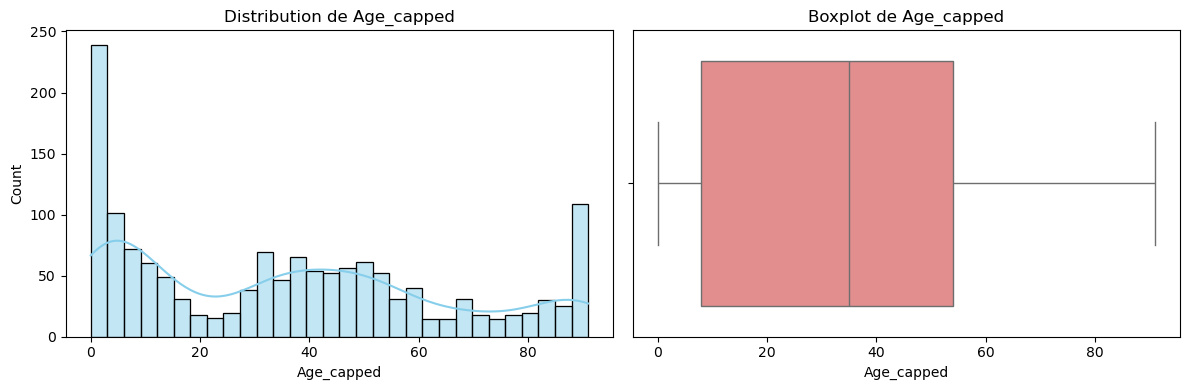

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  91
Moyenne :  35.94041095890411
Ecart-type :  28.883066652306074
Q1  8.0
Q2 :  35.0
Q3  54.0
IQR  46.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  1.0
95%  91.0
99%  91.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de Age_capped : 0.423

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  -0.5397824787104128


In [146]:
analyse(X, 'Age_capped',y)

## TotalPorchSF

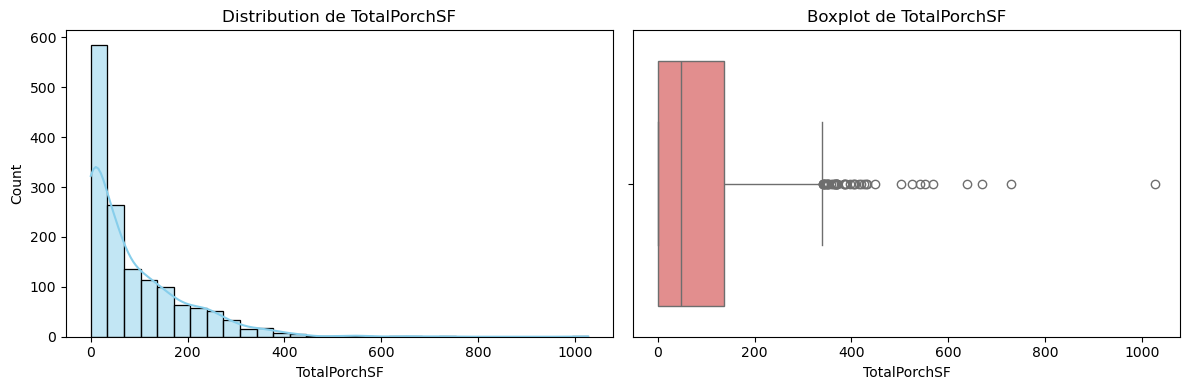

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  1027
Moyenne :  87.08493150684932
Ecart-type :  105.19036390431901
Q1  0.0
Q2 :  48.0
Q3  136.0
IQR  136.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  288.0
99%  410.69000000000074

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de TotalPorchSF : 1.998

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.1957389407838353


In [165]:
analyse(X, 'TotalPorchSF', y)

In [167]:
X['TotalPorchSF_log'] = np.log1p(X['TotalPorchSF'])

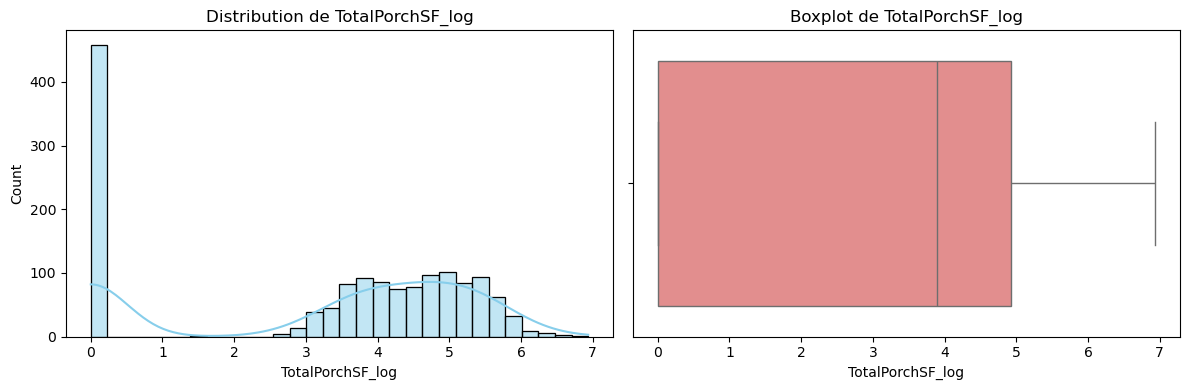

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0.0
Max :  6.93537044601511
Moyenne :  3.111856209605437
Ecart-type :  2.211744709357733
Q1  0.0
Q2 :  3.8918202981106265
Q3  4.919980925828125
IQR  4.919980925828125

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  5.666426688112432
99%  6.0202129838359655

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de TotalPorchSF_log : -0.513

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.2884199584500441


In [169]:
analyse(X, 'TotalPorchSF_log', y)

# Variables Qualitatives

In [176]:
variables_qualitatives.columns

Index(['FireplaceQu', 'KitchenQual', 'BsmtQual', 'Neighborhood', 'ExterQual',
       'HouseStyle', 'MSZoning'],
      dtype='object')

In [178]:
variables_qualitatives

,FireplaceQu,KitchenQual,BsmtQual,Neighborhood,ExterQual,HouseStyle,MSZoning
0,NaN,Gd,Gd,CollgCr,Gd,2Story,RL
1,TA,TA,Gd,Veenker,TA,1Story,RL
2,TA,Gd,Gd,CollgCr,Gd,2Story,RL
3,Gd,Gd,TA,Crawfor,TA,2Story,RL
4,TA,Gd,Gd,NoRidge,Gd,2Story,RL
...,...,...,...,...,...,...,...
1455,TA,TA,Gd,Gilbert,TA,2Story,RL
1456,TA,TA,Gd,NWAmes,TA,1Story,RL
1457,Gd,Gd,TA,Crawfor,Ex,2Story,RL
1458,NaN,Gd,TA,NAmes,TA,1Story,RL


In [180]:
for col in variables_qualitatives:
    print(f"{col}:")
    print(X[col].unique())
    print("-" * 40)

FireplaceQu:
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
----------------------------------------
KitchenQual:
['Gd' 'TA' 'Ex' 'Fa']
----------------------------------------
BsmtQual:
['Gd' 'TA' 'Ex' nan 'Fa']
----------------------------------------
Neighborhood:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
----------------------------------------
ExterQual:
['Gd' 'TA' 'Ex' 'Fa']
----------------------------------------
HouseStyle:
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
----------------------------------------
MSZoning:
['RL' 'RM' 'C (all)' 'FV' 'RH']
----------------------------------------


## FireplaceQu

In [186]:
fireplace_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, np.nan: 0}
X['FireplaceQu_encoded'] = X['FireplaceQu'].map(fireplace_map)

## KitchenQual

In [189]:
kitchen_map = {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
X['KitchenQual_encoded'] = X['KitchenQual'].map(kitchen_map)

## BsmtQual

In [192]:
bsmt_map = {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4, np.nan: 0}
X['BsmtQual_encoded'] = X['BsmtQual'].map(bsmt_map)

## Neighborhood

In [195]:
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)

In [214]:
X.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'FireplaceQu', 'FullBath', 'HalfBath', 'KitchenQual', 'BsmtHalfBath',
       'BsmtFullBath', 'BsmtQual', 'BsmtFinSF1', 'LotArea', 'ExterQual',
       'GarageYrBlt', 'YrSold', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
       '3SsnPorch', 'NbFloors', 'TotalSF', 'Age', 'TotalBath', 'TotalPorchSF',
       'GrLivArea_log', 'GarageArea_capped', 'TotalBsmtSF_capped',
       '1stFlrSF_log', 'has_2ndFlr', 'Fireplaces_log', 'BsmtFinSF1_capped',
       'LotArea_capped', 'OpenPorchSF_log', 'has_OpenPorchSF',
       'OpenPorchSF_trans', 'EnclosedPorch_log', 'hasPorch', 'hasPorch_log',
       'TotalSF_log', 'TotalSF_log_capped', 'Age_log', 'Age_capped',
       'Age_capped_log', 'TotalPorchSF_log', 'FireplaceQu_encoded',
       'KitchenQual_encoded', 'BsmtQual_encoded', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_Br

## ExterQual

In [198]:
exter_map = {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
X['ExterQual_encoded'] = X['ExterQual'].map(exter_map)

## HouseStyle

In [201]:
X = pd.get_dummies(X, columns=['HouseStyle'], drop_first=True)

## MSZoning

In [204]:
X = pd.get_dummies(X, columns=['MSZoning'], drop_first=True)

# Multi-Collinéarité

# Modélisation

## Splitting

In [ ]:
#Splitting


In [ ]:
#Test de représentativité de l'échantillon
